# Churn prediction modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('../Datasets/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

The next steps after the feature engineering is the actual modelling of the dataset.

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Splitting the original DataFrame into training, validation, and testing sets helps prevent overfitting and results in a model with better generalization.

In [7]:
#creating a backup copy of the original dataframe

model_df = df.copy()

model_df.drop(columns=['id'], inplace=True, errors='ignore')

X = model_df.drop(columns=['churn'])
y = model_df['churn']

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Final sizes
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (11684, 61), Test: (2922, 61)


In [29]:
# Initializing the preprocessing pipeline for model features.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features,),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight = 'balanced', random_state=42))
])

param_grid = {
    'classifier__n_estimators' : [100, 200],
    'classifier__max_depth': [None, 10, 20],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for hyperparameter tuning
grid = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = cv,
    scoring= 'accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cons_12m',
                                                                          'cons_gas_12m',
                                                                          'cons_last_month',
                                                                          'forecast_cons_12m',
                                                                          'forecast_discount_energy',
                                                                          'forecast_meter_rent_12m',
                                                                          'forecast_price_energy_off_peak',
                                                                          'forecast_price_energy_peak'...
                                                                          'var_6m_price_peak_var',
                                                                          'var_6m_price_mid_peak_var',
                                                                          'var_6m_price_off_peak_fix',
                                                                          'var_6m_price_peak_fix', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [30]:
# Selecting the model with best parameters and applying on test set for predictions.

# Evaluating the model performance
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best score: 0.9076


In [31]:
# Calculating performance metrics

#TN, FP, FN, TP
confusion = metrics.confusion_matrix(y_test, y_pred)
print("True Negatives: ", confusion[0][0])
print("False Positives: ", confusion[0][1])
print("False Negatives: ", confusion[1][0])
print("True Positives: ", confusion[1][1])

# Accuracy, f1 score, precision, recall, confusion matrix and classification report
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

True Negatives:  2635
False Positives:  3
False Negatives:  259
True Positives:  25
Accuracy:  0.9103353867214237
F1 Score:  0.16025641025641027
Precision:  0.8928571428571429
Recall:  0.0880281690140845
Confusion Matrix: 
 [[2635    3]
 [ 259   25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.89      0.09      0.16       284

    accuracy                           0.91      2922
   macro avg       0.90      0.54      0.56      2922
weighted avg       0.91      0.91      0.88      2922



The model achieves an accuracy score of 91% which, even apparently decent, but is not a reliable metric output. In addition, the precision for positive class is 89% which indicates that out of the total churns predicted by the model, 89% actually churned. However, a low recall of 9% indicates the model's weakness in correctly identifying the actual churners i.e. risk of high false negatives which can lead to losing potential customers. Techniques to improve recall can be applied for a better model avoiding losses.

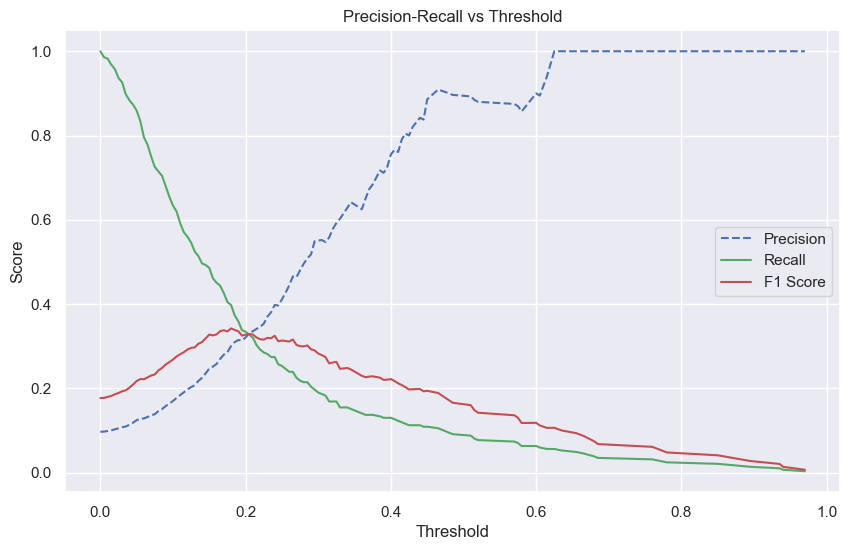

Best threshold with precision ≥ 0.3: 0.085
Precision: 0.151
Recall: 0.704


In [36]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np


y_probs = best_model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


f1 = 2 * (precision * recall) / (precision + recall + 1e-10)  # Add small value to avoid divide by 0


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1[:-1], 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


thresholds = thresholds  
precision = precision[:-1]
recall = recall[:-1]

# Getting the best threshold for the highest recall with precision >= 0.15
valid = precision >= 0.15
best_index = np.argmax(recall[valid])
best_threshold = thresholds[valid][best_index]

print(f"Best threshold with precision ≥ 0.3: {best_threshold:.3f}")
print(f"Precision: {precision[valid][best_index]:.3f}")
print(f"Recall: {recall[valid][best_index]:.3f}")

In [37]:
rf_model = best_model.named_steps['classifier']

importances = rf_model.feature_importances_

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

feature_importances = pd.DataFrame({
    'features': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

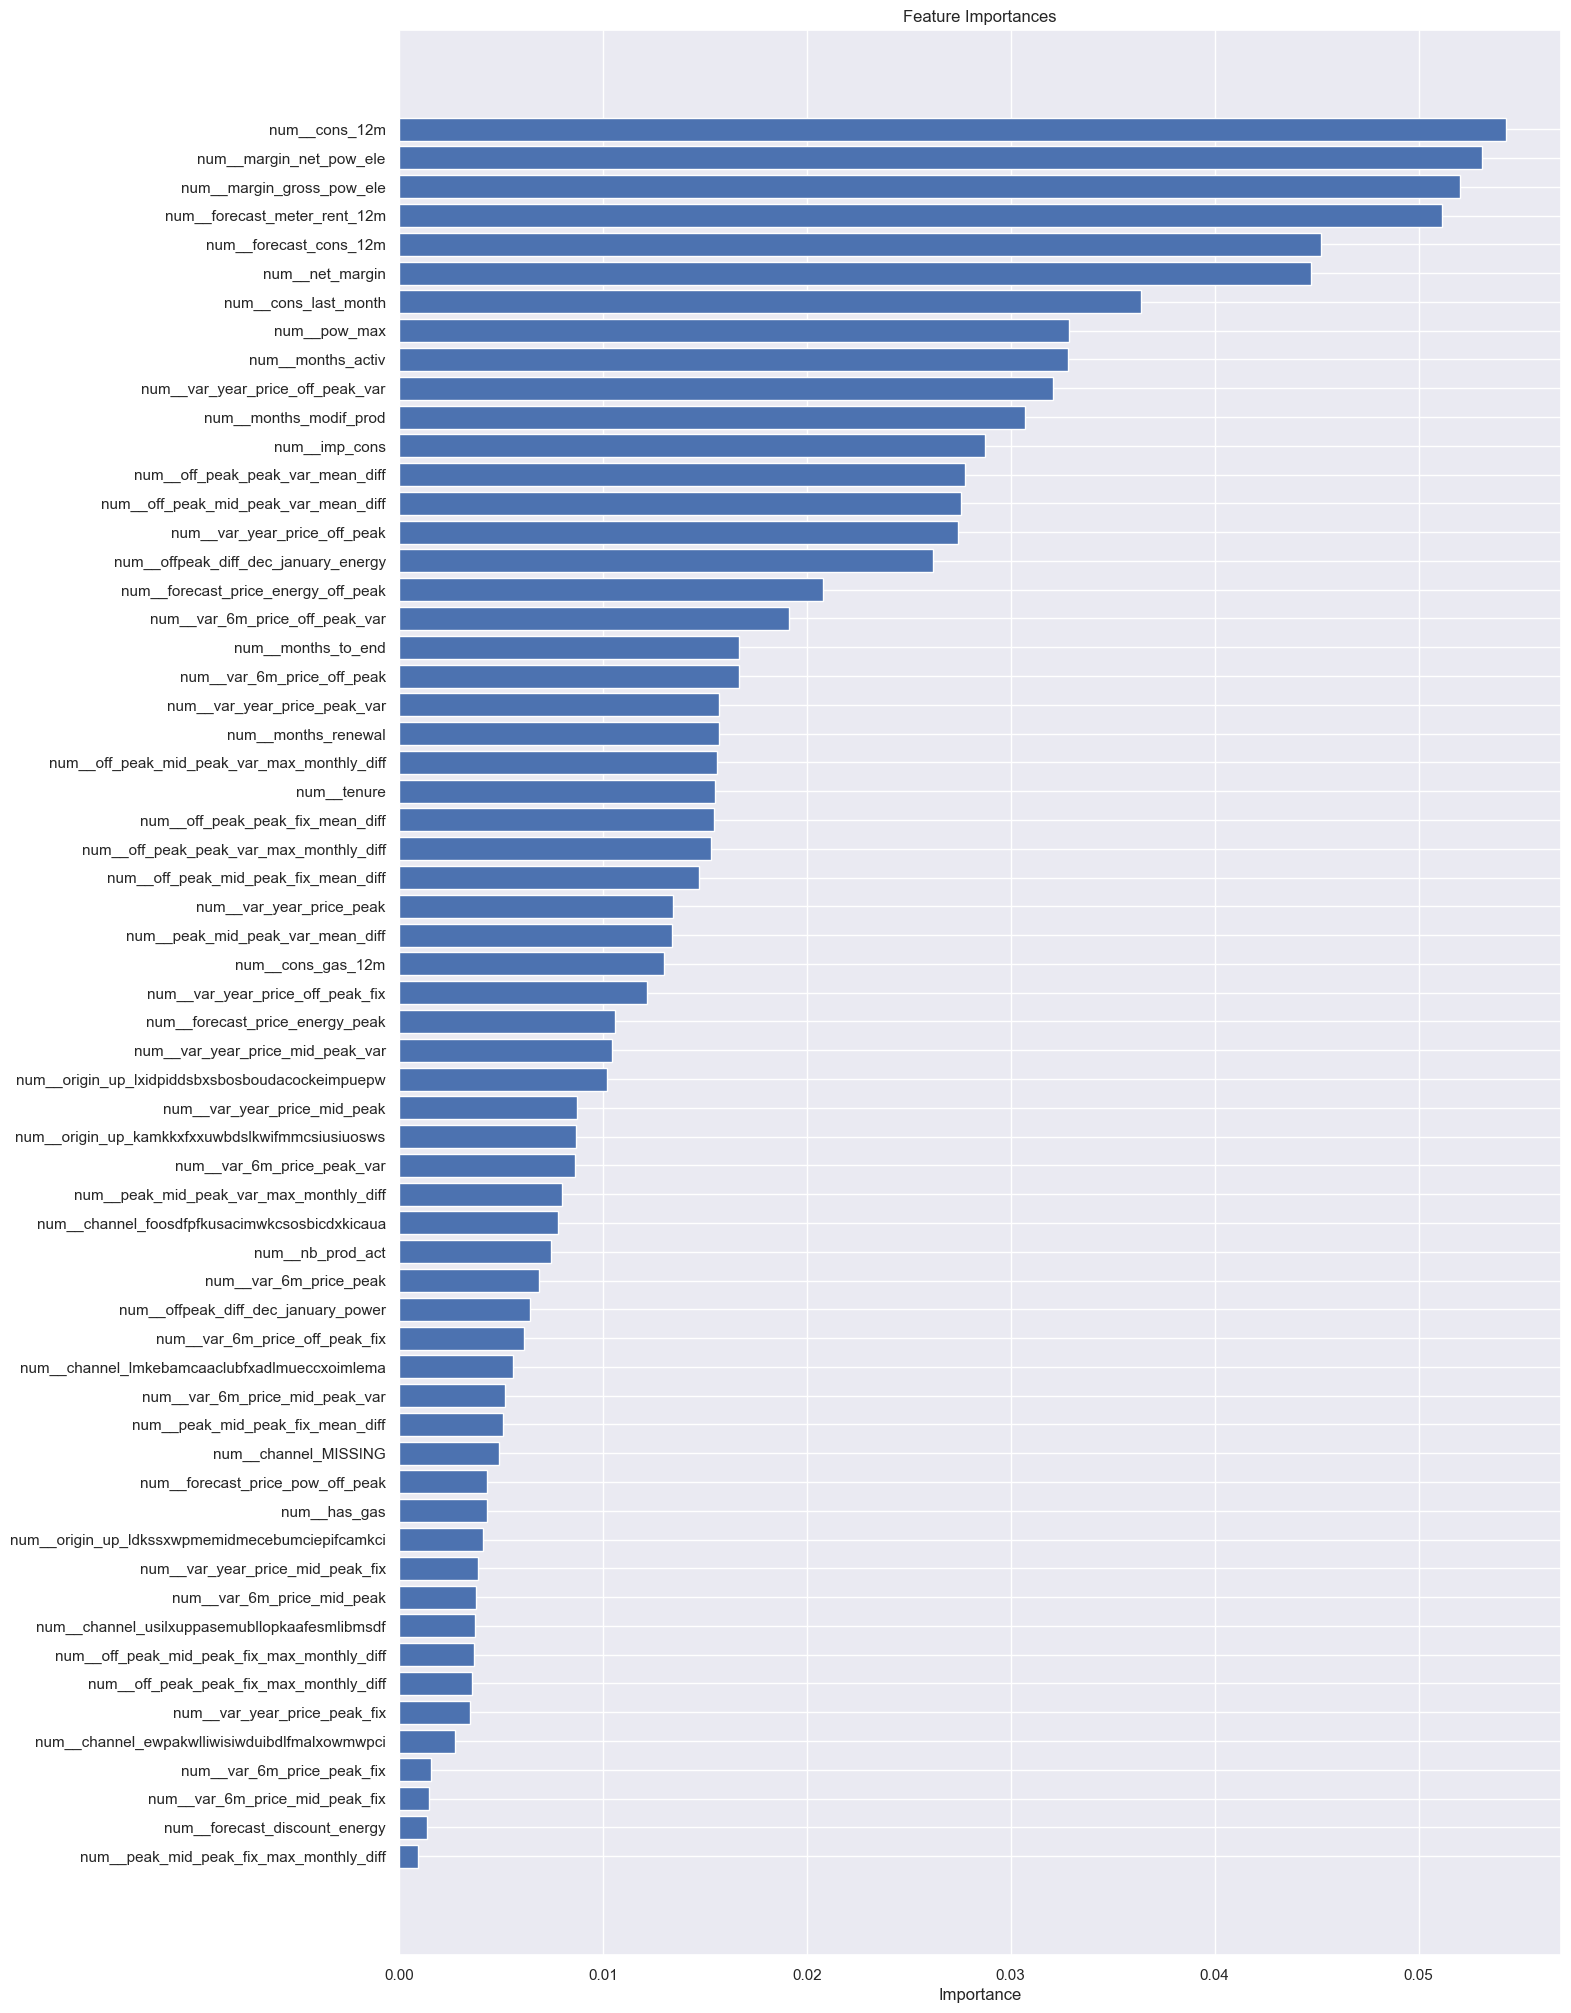

In [38]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From the model analysis top features contributing to the model's predictive performance include historic and forecasted consumptions along with net margin fields. In addition, engineered features like **months_active**, **months_modif_prod**, and **months_to_end** also play a significant role as important features for a better model. However, the hypothesis stating if price senstivity has an impact on customer churn is not a really strong statement to hold true. Further, experimentation might be needed.

In [ ]:
#Storing the predictions and prediction probabilities in a transferable file for further analysis.
proba_predictions = best_model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)


In [41]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')